In [49]:
import csv
import os
import pandas as pd
import numpy as np
import holidays
import datetime
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [50]:
# Get the directory of the current script
script_dir = os.getcwd()

# Navigate through the folder structure to access the dataset
data_dir = os.path.abspath(os.path.join(script_dir, '..', 'data', 'processed', 'Apple'))

# Construct the path to the dataset
dataset_path = os.path.join(data_dir, "Apple_MD_Piedmont.csv")

# Read the dataset
data = pd.read_csv(dataset_path)

In [51]:
data.drop(['geo_type', 'alternative_name', 'sub-region', 'country'], axis=1, inplace=True)
data = data.T.reset_index().rename(columns={'index':'date', 0: 'Italy_driving', 1: 'Italy_transit', 2: 'Italy_walking', 
                                            3: 'Piedmont_driving', 4: 'Piedmont_walking'})
data.drop([0,1], axis=0, inplace=True)
data.reset_index(drop=True, inplace=True)
data['date'] = pd.to_datetime(data['date'], dayfirst=True, format= '%d/%m/%Y')
data = data.astype({'Italy_driving': float, 'Italy_transit': float, 'Italy_walking': float, 'Piedmont_driving': float, 'Piedmont_walking': float})
data

,date,Italy_driving,Italy_transit,Italy_walking,Piedmont_driving,Piedmont_walking
0,2020-01-13,100.00,100.00,100.00,100.00,100.00
1,2020-01-14,102.63,100.82,102.10,102.58,103.81
2,2020-01-15,105.41,100.40,104.86,110.49,113.80
3,2020-01-16,106.18,99.52,107.32,106.71,110.89
4,2020-01-17,114.69,107.35,122.71,116.40,127.67
...,...,...,...,...,...,...
536,2021-07-02,177.82,175.19,149.56,155.18,148.48
537,2021-07-03,188.56,183.00,177.92,154.93,156.96
538,2021-07-04,184.42,181.58,139.59,147.43,119.75
539,2021-07-05,159.98,187.18,144.00,138.92,135.61


In [52]:
data.isnull().sum()

date                0
Italy_driving       3
Italy_transit       3
Italy_walking       3
Piedmont_driving    3
Piedmont_walking    1
dtype: int64

In [53]:
data.columns

Index(['date', 'Italy_driving', 'Italy_transit', 'Italy_walking',
       'Piedmont_driving', 'Piedmont_walking'],
      dtype='object')

In [54]:
# Data is missing only for some dates

In [55]:
data = data[['date', 'Piedmont_driving', 'Piedmont_walking']]
data

,date,Piedmont_driving,Piedmont_walking
0,2020-01-13,100.00,100.00
1,2020-01-14,102.58,103.81
2,2020-01-15,110.49,113.80
3,2020-01-16,106.71,110.89
4,2020-01-17,116.40,127.67
...,...,...,...
536,2021-07-02,155.18,148.48
537,2021-07-03,154.93,156.96
538,2021-07-04,147.43,119.75
539,2021-07-05,138.92,135.61


In [56]:
data.iloc[:48,:]

,date,Piedmont_driving,Piedmont_walking
0,2020-01-13,100.00,100.00
1,2020-01-14,102.58,103.81
2,2020-01-15,110.49,113.80
3,2020-01-16,106.71,110.89
4,2020-01-17,116.40,127.67
5,2020-01-18,127.73,157.02
6,2020-01-19,111.40,103.21
7,2020-01-20,99.67,100.67
8,2020-01-21,102.99,105.53
9,2020-01-22,115.02,113.59


In [57]:
start_date = datetime.datetime(year=2020, month=1, day=13)
end_date = datetime.datetime(year=2021, month=7, day=6)

In [58]:
pd.date_range(start_date, end_date)

DatetimeIndex(['2020-01-13', '2020-01-14', '2020-01-15', '2020-01-16',
               '2020-01-17', '2020-01-18', '2020-01-19', '2020-01-20',
               '2020-01-21', '2020-01-22',
               ...
               '2021-06-27', '2021-06-28', '2021-06-29', '2021-06-30',
               '2021-07-01', '2021-07-02', '2021-07-03', '2021-07-04',
               '2021-07-05', '2021-07-06'],
              dtype='datetime64[ns]', length=541, freq='D')

In [59]:
dates= pd.DataFrame()
dates['date'] = pd.date_range(start_date, end_date)
dates

,date
0,2020-01-13
1,2020-01-14
2,2020-01-15
3,2020-01-16
4,2020-01-17
...,...
536,2021-07-02
537,2021-07-03
538,2021-07-04
539,2021-07-05


In [60]:
dates = dates.set_index('date')
dates['Day_Of_Week'] = dates.index.dayofweek +1
# It is assumed the week starts on Monday, which is denoted by 1 and ends on Sunday which is denoted by 7.
dates.reset_index(inplace=True)
dates

,date,Day_Of_Week
0,2020-01-13,1
1,2020-01-14,2
2,2020-01-15,3
3,2020-01-16,4
4,2020-01-17,5
...,...,...
536,2021-07-02,5
537,2021-07-03,6
538,2021-07-04,7
539,2021-07-05,1


In [61]:
# merging the holidays data with validations data
data = pd.merge(data, dates, how='outer', on='date')
data

,date,Piedmont_driving,Piedmont_walking,Day_Of_Week
0,2020-01-13,100.00,100.00,1
1,2020-01-14,102.58,103.81,2
2,2020-01-15,110.49,113.80,3
3,2020-01-16,106.71,110.89,4
4,2020-01-17,116.40,127.67,5
...,...,...,...,...
536,2021-07-02,155.18,148.48,5
537,2021-07-03,154.93,156.96,6
538,2021-07-04,147.43,119.75,7
539,2021-07-05,138.92,135.61,1


In [40]:
data.iloc[:48,:]

,date,Piedmont_driving,Piedmont_walking,Day_Of_Week
0,2020-01-13,100.00,100.00,1
1,2020-01-14,102.58,103.81,2
2,2020-01-15,110.49,113.80,3
3,2020-01-16,106.71,110.89,4
4,2020-01-17,116.40,127.67,5
5,2020-01-18,127.73,157.02,6
6,2020-01-19,111.40,103.21,7
7,2020-01-20,99.67,100.67,1
8,2020-01-21,102.99,105.53,2
9,2020-01-22,115.02,113.59,3


In [62]:
# take mean value from Jan and full February
mean = data.iloc[:48,:]

In [63]:
ms = {'Day_Of_Week':  [1, 2, 3, 4, 5, 6, 7],
      'Piedmont_driving_mean': [mean[mean['Day_Of_Week']==1].Piedmont_driving.mean(), mean[mean['Day_Of_Week']==2].Piedmont_driving.mean(), mean[mean['Day_Of_Week']==3].Piedmont_driving.mean(), mean[mean['Day_Of_Week']==4].Piedmont_driving.mean(),
                               mean[mean['Day_Of_Week']==5].Piedmont_driving.mean(), mean[mean['Day_Of_Week']==6].Piedmont_driving.mean(), mean[mean['Day_Of_Week']==7].Piedmont_driving.mean()],
      'Piedmont_walking_mean': [mean[mean['Day_Of_Week']==1].Piedmont_walking.mean(), mean[mean['Day_Of_Week']==2].Piedmont_walking.mean(), mean[mean['Day_Of_Week']==3].Piedmont_walking.mean(), mean[mean['Day_Of_Week']==4].Piedmont_walking.mean(),
                               mean[mean['Day_Of_Week']==5].Piedmont_walking.mean(), mean[mean['Day_Of_Week']==6].Piedmont_walking.mean(), mean[mean['Day_Of_Week']==7].Piedmont_walking.mean()]}

means = pd.DataFrame (ms, columns = ['Day_Of_Week','Piedmont_driving_mean', 'Piedmont_walking_mean'])
means['Piedmont_driving_mean'] = means['Piedmont_driving_mean'].astype(float).apply(lambda x: '{:.2f}'.format(x))
means['Piedmont_walking_mean'] = means['Piedmont_walking_mean'].astype(float).apply(lambda x: '{:.2f}'.format(x))
means

,Day_Of_Week,Piedmont_driving_mean,Piedmont_walking_mean
0,1,99.33,103.54
1,2,102.03,104.63
2,3,106.99,109.52
3,4,106.47,110.62
4,5,119.96,130.01
5,6,125.12,152.24
6,7,115.42,109.69


In [64]:
# merging the holidays data with validations data
data = pd.merge(data, means, how='outer', on='Day_Of_Week')
data.sort_values(by='date', inplace=True)
data.reset_index(drop=True, inplace=True)
data

,date,Piedmont_driving,Piedmont_walking,Day_Of_Week,Piedmont_driving_mean,Piedmont_walking_mean
0,2020-01-13,100.00,100.00,1,99.33,103.54
1,2020-01-14,102.58,103.81,2,102.03,104.63
2,2020-01-15,110.49,113.80,3,106.99,109.52
3,2020-01-16,106.71,110.89,4,106.47,110.62
4,2020-01-17,116.40,127.67,5,119.96,130.01
...,...,...,...,...,...,...
536,2021-07-02,155.18,148.48,5,119.96,130.01
537,2021-07-03,154.93,156.96,6,125.12,152.24
538,2021-07-04,147.43,119.75,7,115.42,109.69
539,2021-07-05,138.92,135.61,1,99.33,103.54


In [65]:
# keeping only the data from March 2020 on
data = data.iloc[48:,:]
data = data.copy()
data

,date,Piedmont_driving,Piedmont_walking,Day_Of_Week,Piedmont_driving_mean,Piedmont_walking_mean
48,2020-03-01,92.84,75.12,7,115.42,109.69
49,2020-03-02,86.58,69.02,1,99.33,103.54
50,2020-03-03,93.25,89.22,2,102.03,104.63
51,2020-03-04,91.48,89.96,3,106.99,109.52
52,2020-03-05,89.22,76.36,4,106.47,110.62
...,...,...,...,...,...,...
536,2021-07-02,155.18,148.48,5,119.96,130.01
537,2021-07-03,154.93,156.96,6,125.12,152.24
538,2021-07-04,147.43,119.75,7,115.42,109.69
539,2021-07-05,138.92,135.61,1,99.33,103.54


In [66]:
data.Piedmont_driving_mean = data.Piedmont_driving_mean.astype(float)
data.Piedmont_walking_mean = data.Piedmont_walking_mean.astype(float)

In [67]:
data['Piedmont_driving'] = data['Piedmont_driving'] - data['Piedmont_driving_mean']
data['Piedmont_walking'] = data['Piedmont_walking'] - data['Piedmont_walking_mean']
data

,date,Piedmont_driving,Piedmont_walking,Day_Of_Week,Piedmont_driving_mean,Piedmont_walking_mean
48,2020-03-01,-22.58,-34.57,7,115.42,109.69
49,2020-03-02,-12.75,-34.52,1,99.33,103.54
50,2020-03-03,-8.78,-15.41,2,102.03,104.63
51,2020-03-04,-15.51,-19.56,3,106.99,109.52
52,2020-03-05,-17.25,-34.26,4,106.47,110.62
...,...,...,...,...,...,...
536,2021-07-02,35.22,18.47,5,119.96,130.01
537,2021-07-03,29.81,4.72,6,125.12,152.24
538,2021-07-04,32.01,10.06,7,115.42,109.69
539,2021-07-05,39.59,32.07,1,99.33,103.54


In [68]:
# Construct the path to the dataset
new_dataset_path = os.path.join(data_dir, "Apple_MD_Piedmont_mean.csv")

# saving the DataFrame as a CSV file
data.to_csv(new_dataset_path, header=True, index=True, sep=';')

In [69]:
data['Piedmont_driving_rolling'] = data.Piedmont_driving.rolling(7).mean()
data['Piedmont_walking_rolling'] = data.Piedmont_walking.rolling(7).mean()
data

,date,Piedmont_driving,Piedmont_walking,Day_Of_Week,Piedmont_driving_mean,Piedmont_walking_mean,Piedmont_driving_rolling,Piedmont_walking_rolling
48,2020-03-01,-22.58,-34.57,7,115.42,109.69,NaN,NaN
49,2020-03-02,-12.75,-34.52,1,99.33,103.54,NaN,NaN
50,2020-03-03,-8.78,-15.41,2,102.03,104.63,NaN,NaN
51,2020-03-04,-15.51,-19.56,3,106.99,109.52,NaN,NaN
52,2020-03-05,-17.25,-34.26,4,106.47,110.62,NaN,NaN
...,...,...,...,...,...,...,...,...
536,2021-07-02,35.22,18.47,5,119.96,130.01,36.520000,21.667143
537,2021-07-03,29.81,4.72,6,125.12,152.24,36.878571,22.101429
538,2021-07-04,32.01,10.06,7,115.42,109.69,35.811429,22.094286
539,2021-07-05,39.59,32.07,1,99.33,103.54,36.311429,23.027143


# **7-day rolling averages**

C:\Users\mrnkl\AppData\Local\Temp\ipykernel_66932\281087715.py:76: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Mar 2020', 'Apr 2020', 'Mag 2020', 'Giu 2020', 'Lug 2020', 'Ago 2020', 'Set 2020', 'Ott 2020', 'Nov 2020', 'Dic 2020',


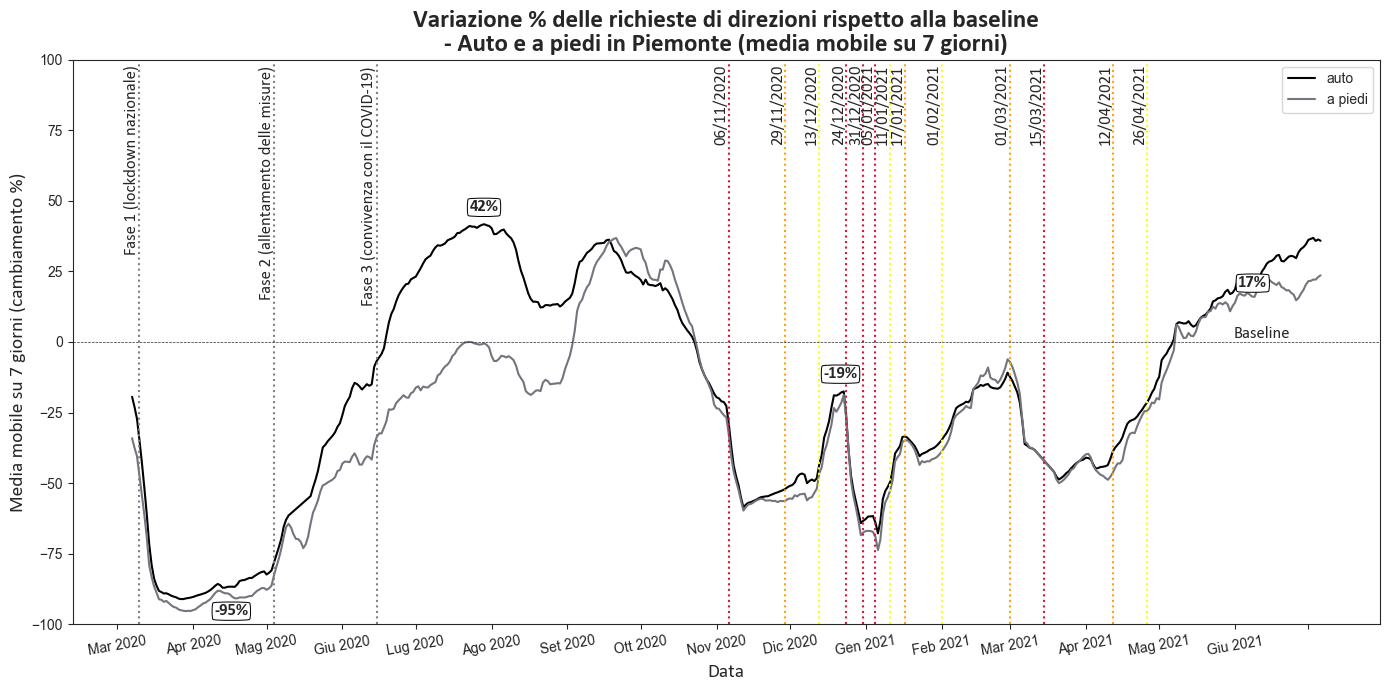

In [70]:
cfont = {'fontname':'Calibri'}

#sns.set_context("talk")
#sns.set(rc={"figure.figsize":(18, 7)})
sns.set_style('ticks')

fig, ax = plt.subplots(figsize = (14,7)) 

# Time series plot with Seaborn lineplot()
sns.lineplot(ax=ax, x="date", y='Piedmont_driving_rolling', label= 'auto', data=data, color='black') #blue
sns.lineplot(ax=ax, x="date", y='Piedmont_walking_rolling', label= 'a piedi', data=data, color='#73747e')

# axis labels
ax.set_title("Variazione % delle richieste di direzioni rispetto alla baseline\n- Auto e a piedi in Piemonte (media mobile su 7 giorni)", size=18, weight= 'bold', **cfont)
ax.set_xlabel("Data", size=14, **cfont)
ax.set_ylabel("Media mobile su 7 giorni (cambiamento %)", size=14, **cfont)

phases = [pd.to_datetime('2020-03-10'), pd.to_datetime('2020-05-04'), pd.to_datetime('2020-06-15')]
for x in phases:
    ax.axvline(x=x, color='gray', linestyle=':')
    
red_zones = [pd.to_datetime('2020-11-06'), pd.to_datetime('2020-12-24'), pd.to_datetime('2020-12-31'), pd.to_datetime('2021-01-05'), pd.to_datetime('2021-03-15')]
for x in red_zones:
    ax.axvline(x=x, color='crimson', linestyle=':')
    
orange_zones = [pd.to_datetime('2020-11-29'), pd.to_datetime('2021-01-17'), pd.to_datetime('2021-03-01'), pd.to_datetime('2021-04-12')]
for x in orange_zones:
    ax.axvline(x=x, color='orange', linestyle=':')
    
yellow_zones = [pd.to_datetime('2020-12-13'), pd.to_datetime('2021-01-11'), pd.to_datetime('2021-02-01'), pd.to_datetime('2021-04-26')]
for x in yellow_zones:
    ax.axvline(x=x, color='yellow', linestyle=':')
    
annotations = pd.DataFrame({'x': [pd.to_datetime('2020-03-10'), pd.to_datetime('2020-05-04'), pd.to_datetime('2020-06-15'),
                                  pd.to_datetime('2020-11-06'), pd.to_datetime('2020-11-29'), pd.to_datetime('2020-12-13'), pd.to_datetime('2020-12-24'), pd.to_datetime('2020-12-31'),
                                  pd.to_datetime('2021-01-05'), pd.to_datetime('2021-01-11'), pd.to_datetime('2021-01-17'), pd.to_datetime('2021-02-01'), pd.to_datetime('2021-03-01'),
                                  pd.to_datetime('2021-03-15'), pd.to_datetime('2021-04-12'), pd.to_datetime('2021-04-26')], 
                            'y': [30, 14, 12, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69]}, 
                           index=['Fase 1 (lockdown nazionale)', 'Fase 2 (allentamento delle misure)', 'Fase 3 (convivenza con il COVID-19)', '06/11/2020', '29/11/2020', '13/12/2020', '24/12/2020', 
                                  '31/12/2020', '05/01/2021', '11/01/2021', '17/01/2021', '01/02/2021', '01/03/2021', '15/03/2021', '12/04/2021', '26/04/2021'])
for t, p in annotations.iterrows():
    ax.annotate(text=t, xy=p, xytext=(-11, 4), textcoords='offset points', rotation=90, fontsize=12, **cfont)

import matplotlib.dates as mdates
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
#plt.gcf().autofmt_xdate() # Rotation

ax.axhline(y=0, color='#28282c', linestyle='--', linewidth=0.5)
ax.annotate(text='Baseline', xy=(pd.to_datetime('2021-06-01'), 0), xytext=(-1, 3), textcoords='offset points', rotation=0, fontsize=12, **cfont)

bbox_props = dict(boxstyle="round4, pad=0.15", fc="w", ec="k", lw=0.72)
#arrowprops=dict(arrowstyle="-|>", facecolor='black', connectionstyle="arc3")
kw = dict(xycoords='data', textcoords="offset points", fontsize=12, fontweight='bold', bbox=bbox_props, ha="right", va="top") #arrowprops=arrowprops

ax.annotate('{:,d}%'.format(np.round(data['Piedmont_walking_rolling'].min()).astype(int)), 
            xy=(data[data['Piedmont_walking_rolling'] == data['Piedmont_walking_rolling'].min()].date.iloc[0],
                data['Piedmont_walking_rolling'].min()),
            xytext=(45, 5), **cfont, **kw)

ax.annotate('{:,d}%'.format(np.round(data[data.date.dt.month == 7].Piedmont_driving_rolling.max()).astype(int)), 
            xy=(data[data['Piedmont_driving_rolling'] == data[data.date.dt.month == 8].Piedmont_driving_rolling.max()].date.iloc[0],
                data[data.date.dt.month == 8].Piedmont_driving_rolling.max()),
            xytext=(5, 20), **cfont, **kw)

ax.annotate('{:,d}%'.format(np.round(data[data.date.dt.month == 12].Piedmont_walking_rolling.max()).astype(int)), 
            xy=(data[data['Piedmont_walking_rolling'] == data[data.date.dt.month == 12].Piedmont_walking_rolling.max()].date.iloc[0],
                data[data.date.dt.month == 12].Piedmont_walking_rolling.max()),
            xytext=(10, 20), **cfont, **kw)

ax.annotate('{:,d}%'.format(np.round(data[data['date'] == '2021-05-31'].Piedmont_driving_rolling.iloc[0]).astype(int)), 
            xy=(pd.to_datetime('2021-05-31'), data[data['date'] == '2021-05-31'].Piedmont_driving_rolling.iloc[0]),
            xytext=(25, 12), **cfont, **kw)

ax.set_ylim(-100, 100)
ax.set_xticklabels(['Mar 2020', 'Apr 2020', 'Mag 2020', 'Giu 2020', 'Lug 2020', 'Ago 2020', 'Set 2020', 'Ott 2020', 'Nov 2020', 'Dic 2020',
                  'Gen 2021', 'Feb 2021', 'Mar 2021', 'Apr 2021', 'Mag 2021', 'Giu 2021'])
plt.xticks(rotation=10)
fig.tight_layout()

# Change major ticks to show every 20.
#ax.xaxis.set_major_locator(MultipleLocator(20))

# Change minor ticks to show every 5. (20/4 = 5)
#ax.xaxis.set_minor_locator(AutoMinorLocator(4))

# Turn grid on for both major and minor ticks and style minor slightly
# differently.
#ax.grid(which='major', color='#CCCCCC', linestyle='--')
#ax.grid(which='minor', color='#CCCCCC', linestyle=':')

plt.show()